Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

## Mount Google Drive into Colab

In [6]:
# mount google drive in to your Colab enviornment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:

directory = '/content/drive/MyDrive/Colab_Notebooks/Quarter2_AIC/DL_Assignments/flowers'
filetype = '/*.jpg'

## Importing Libraries

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from os import listdir
import os
from os.path import join
import cv2
import pathlib
from pathlib import Path

# Loading Data

In [14]:
directory

'/content/drive/MyDrive/Colab_Notebooks/Quarter2_AIC/DL_Assignments/flowers'

In [15]:
folders = os.listdir(directory)
print(folders)

['daisy', 'dandelion', 'rose', 'tulip', 'sunflower']


In [16]:
image_names = []
labels = []
data_images = []

size = 320, 240


for folder in folders:
    for file in os.listdir(os.path.join(directory,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(directory,folder,file))
            labels.append(folder)
            img = cv2.imread(os.path.join(directory,folder,file) , cv2.IMREAD_GRAYSCALE)
            im = cv2.resize(img,size)
            data_images.append(im)
        else:
            continue

In [21]:
display(len(labels))
display(len(image_names))
len(data_images)

4323

4323

4323

## Mapping the String into numeric

In [23]:

df= pd.DataFrame(labels)
labels=df[0].map({"rose":0,"sunflower":1,"tulip":2,"daisy":3,"dandelion":4})

In [26]:
labels

0       3
1       3
2       3
3       3
4       3
       ..
4318    1
4319    1
4320    1
4321    1
4322    1
Name: 0, Length: 4323, dtype: int64

In [27]:
image_names[0]

'/content/drive/MyDrive/Colab_Notebooks/Quarter2_AIC/DL_Assignments/flowers/daisy/16577886423_9b23622f1d_n.jpg'

In [28]:
data_images[0]

array([[17, 18, 18, ..., 27, 27, 27],
       [17, 18, 18, ..., 28, 28, 28],
       [17, 18, 18, ..., 29, 28, 28],
       ...,
       [ 1,  1,  1, ..., 15, 15, 15],
       [ 1,  1,  1, ..., 16, 16, 16],
       [ 1,  1,  1, ..., 17, 17, 17]], dtype=uint8)

## Data Preparation

In [ ]:
import sklearn

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=  train_test_split (data_images, labels, test_size=.40, random_state=1)

In [ ]:
x_train= np.asarray(x_train).astype("float32")

In [ ]:
x_test= np.asarray(x_test).astype("float32")

In [ ]:
x_train.shape #Shape of training data

(2593, 240, 320)

In [ ]:
y_train.shape #Shape of training label

(2593,)

In [ ]:
x_test.shape #Shape of testing data

(1730, 240, 320)

In [ ]:
y_test.shape #Shape of testing label

(1730,)

In [ ]:
x_train= x_train.reshape(2593, 320*240)
x_train

In [ ]:
x_test= x_test.reshape(1730, 320*240)
x_test

In [ ]:
x_train[0]

array([169., 168., 167., ..., 166., 160., 162.], dtype=float32)

In [ ]:
x_test[0]

array([ 94.,  95.,  95., ..., 143., 144., 143.], dtype=float32)

## Normalising Data

In [ ]:
#normalize the data

x_train= x_train/255.0
x_train[0]

array([0.6627451 , 0.65882355, 0.654902  , ..., 0.6509804 , 0.627451  ,
       0.63529414], dtype=float32)

In [ ]:
x_test= x_test/255.0
x_test[0]

array([0.36862746, 0.37254903, 0.37254903, ..., 0.56078434, 0.5647059 ,
       0.56078434], dtype=float32)

## Data Encoding

In [ ]:
from keras.utils import to_categorical

y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

# 1.Using Add Droupout Method

In [ ]:
x_train.shape

(2593, 76800)

In [ ]:
y_train.shape

(2593, 5)

### Model definition

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop

model = Sequential()
model.add(Dense(256, activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history=  model.fit(x_train, y_train, batch_size= 1, epochs= 20)

Epoch 1/20
2593/2593 [==============================] - 186s 71ms/step - loss: 65.6715 - accuracy: 0.1914
Epoch 2/20
2593/2593 [==============================] - 185s 72ms/step - loss: 1.9855 - accuracy: 0.2458
Epoch 3/20
2593/2593 [==============================] - 185s 71ms/step - loss: 1.6306 - accuracy: 0.2071
Epoch 4/20
2593/2593 [==============================] - 185s 72ms/step - loss: 1.6118 - accuracy: 0.2332
Epoch 5/20
2593/2593 [==============================] - 185s 71ms/step - loss: 1.6038 - accuracy: 0.2360
Epoch 6/20
2593/2593 [==============================] - 185s 71ms/step - loss: 1.6115 - accuracy: 0.2196
Epoch 7/20
2593/2593 [==============================] - 185s 71ms/step - loss: 1.6011 - accuracy: 0.2505
Epoch 8/20
2593/2593 [==============================] - 185s 71ms/step - loss: 1.6114 - accuracy: 0.2277
Epoch 9/20
2593/2593 [==============================] - 184s 71ms/step - loss: 1.6074 - accuracy: 0.2331
Epoch 10/20
2593/2593 [==============================]

### Plotting Loss and Accuracy

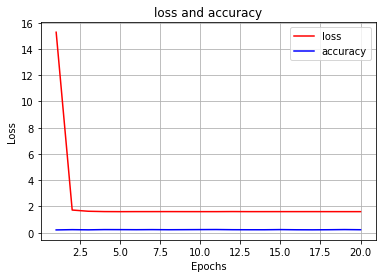

In [ ]:

history_dict = history.history
loss_values = history_dict['loss']
val_accuracy = history_dict['accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='loss')
plt.plot(epochs, val_accuracy, 'b', label='accuracy')
plt.title('loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Evaluation and Prediction

In [ ]:
results= model.evaluate(x_test, y_test)

55/55 [==============================] - 2s 34ms/step - loss: 1.6034 - accuracy: 0.2486


In [ ]:
pred=network.predict(x_test)

In [ ]:
pred[0]

array([0.29899377, 0.03417077, 0.11019462, 0.18276   , 0.37388083],
      dtype=float32)

In [ ]:
x_test[0]

array([0.36862746, 0.37254903, 0.37254903, ..., 0.56078434, 0.5647059 ,
       0.56078434], dtype=float32)

In [ ]:
pred = network.predict_classes(x_test[:5])
for i in range(len(pred)):
    print(f"Prediction = {pred[i]} Testing Data = {y_test[i]}")

Prediction = 4 Testing Data = [0. 1. 0. 0. 0.]
Prediction = 0 Testing Data = [0. 0. 0. 0. 1.]
Prediction = 2 Testing Data = [0. 0. 1. 0. 0.]
Prediction = 1 Testing Data = [0. 0. 0. 0. 1.]
Prediction = 2 Testing Data = [1. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# 2.Using Add Dropout Method (Better Results)

### Model definition

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop

network=Sequential()
network.add(Dense(256,activation="relu",input_shape=(x_train.shape[1],)))
network.add(Dropout(0.2))
network.add(Dense(128,activation="relu"))
network.add(Dense(64,activation="relu"))
network.add(Dropout(0.2))
network.add(Dense(5,activation="softmax"))

In [71]:
network.compile(optimizer=RMSprop(0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history=  network.fit(x_train, y_train, batch_size= 20, epochs= 100)

Epoch 1/100
130/130 [==============================] - 21s 151ms/step - loss: 2.9023 - accuracy: 0.2123
Epoch 2/100
130/130 [==============================] - 20s 150ms/step - loss: 1.6046 - accuracy: 0.2423
Epoch 3/100
130/130 [==============================] - 20s 151ms/step - loss: 1.6044 - accuracy: 0.2549
Epoch 4/100
130/130 [==============================] - 20s 151ms/step - loss: 1.5750 - accuracy: 0.2913
Epoch 5/100
130/130 [==============================] - 20s 151ms/step - loss: 1.5801 - accuracy: 0.2638
Epoch 6/100
130/130 [==============================] - 20s 150ms/step - loss: 1.5759 - accuracy: 0.2824
Epoch 7/100
130/130 [==============================] - 20s 151ms/step - loss: 1.5696 - accuracy: 0.2819
Epoch 8/100
130/130 [==============================] - 20s 151ms/step - loss: 1.5611 - accuracy: 0.2810
Epoch 9/100
130/130 [==============================] - 20s 151ms/step - loss: 1.5555 - accuracy: 0.2880
Epoch 10/100
130/130 [==============================] - 20s 151m

In [72]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

### Plotting Loss and Accuracy

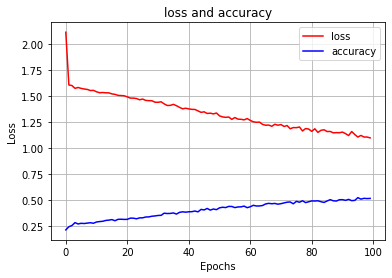

In [74]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_accuracy = history_dict['accuracy']
epochs = range(100)
plt.plot(epochs, loss_values, 'r', label='loss')
plt.plot(epochs, val_accuracy, 'b', label='accuracy')
plt.title('loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Evaluation and Prediction

In [80]:
results= network.evaluate(x_test, y_test)

55/55 [==============================] - 2s 33ms/step - loss: 1.7791 - accuracy: 0.3058


In [104]:
pred=network.predict(x_test)

In [102]:
pred[0]

array([0.29899377, 0.03417077, 0.11019462, 0.18276   , 0.37388083],
      dtype=float32)

In [103]:
x_test[0]

array([0.36862746, 0.37254903, 0.37254903, ..., 0.56078434, 0.5647059 ,
       0.56078434], dtype=float32)

In [113]:
pred = network.predict_classes(x_test[:5])
for i in range(len(pred)):
    print(f"Prediction = {pred[i]} Testing Data = {y_test[i]}")

Prediction = 4 Testing Data = [0. 1. 0. 0. 0.]
Prediction = 0 Testing Data = [0. 0. 0. 0. 1.]
Prediction = 2 Testing Data = [0. 0. 1. 0. 0.]
Prediction = 1 Testing Data = [0. 0. 0. 0. 1.]
Prediction = 2 Testing Data = [1. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
